In [79]:
import psycopg2
from psycopg2.extensions import connection

In [80]:
from dotenv import load_dotenv
import os
load_dotenv()

DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [81]:
conn = psycopg2.connect(f"dbname={DB_NAME} user={DB_USER} password={DB_PASSWORD} host=localhost")

In [82]:
table = "media_microservices"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [83]:
# Create a dataframe

import pandas as pd
df = pd.DataFrame(raw_data, columns=column_names)
df.head()

,id,cast_info_memcached_cpu,cast_info_memcached_memory,cast_info_mongodb_cpu,cast_info_mongodb_memory,cast_info_service_cpu,cast_info_service_memory,compose_review_memcached_cpu,compose_review_memcached_memory,compose_review_service_cpu,...,user_mongodb_memory,user_review_mongodb_cpu,user_review_mongodb_memory,user_review_redis_cpu,user_review_redis_memory,user_review_service_cpu,user_review_service_memory,user_service_cpu,user_service_memory,timestamp
0,1,0.114139,1.597656,4.798393,118.171875,0.046596,7.761719,0.179933,1.585938,0.004000,...,76.285156,5.103414,60.230469,1.380068,2.652344,0.033197,1.375000,0.013899,2.328125,1716395897
1,2,0.171359,1.597656,4.796310,118.171875,0.013893,7.761719,0.180305,1.585938,0.003998,...,76.285156,8.232341,60.230469,1.379470,2.652344,0.033182,1.375000,0.014892,2.328125,1716395907
2,3,0.171292,1.597656,3.857690,118.171875,0.033519,7.761719,0.180234,1.585938,0.005095,...,76.285156,3.129912,60.230469,1.707374,2.402344,0.026426,1.375000,0.045658,2.328125,1716395917
3,4,0.186708,1.597656,7.610642,118.171875,0.048313,7.761719,0.155232,1.585938,0.005096,...,76.285156,4.328497,60.230469,4.614828,2.574219,0.026430,1.375000,0.030777,2.328125,1716395927
4,5,0.291505,1.597656,3.752696,118.171875,0.014790,7.761719,0.155246,1.585938,194.652173,...,81.835938,144.798237,77.011719,2.907460,2.574219,38.543033,4.699219,84.647871,7.292969,1716395937


In [84]:
table = "media_microservices_predicted"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
raw_predicted_data = cur.fetchall()
column_names = [desc[0] for desc in cur.description]
cur.close()

In [85]:
# Create a dataframe

import pandas as pd
df_predicted = pd.DataFrame(raw_predicted_data, columns=column_names)
df_predicted.head()

,id,cast_info_memcached_cpu,cast_info_memcached_memory,cast_info_mongodb_cpu,cast_info_mongodb_memory,cast_info_service_cpu,cast_info_service_memory,compose_review_memcached_cpu,compose_review_memcached_memory,compose_review_service_cpu,...,user_mongodb_memory,user_review_mongodb_cpu,user_review_mongodb_memory,user_review_redis_cpu,user_review_redis_memory,user_review_service_cpu,user_review_service_memory,user_service_cpu,user_service_memory,timestamp
0,1,0.170371,1.829806,5.019734,112.030900,0.027161,7.159400,97.287900,6.646767,234.987240,...,57.611156,98.170586,109.055080,11.885834,3.847729,72.721420,7.233077,42.05748,4.915935,1716395997
1,2,0.187872,1.855851,5.061050,111.361970,0.028266,7.221815,47.728980,6.639958,92.765175,...,57.484050,44.419086,112.487640,7.259136,3.803002,37.532703,7.361552,21.59400,4.559028,1716396007
2,3,0.218561,1.866543,5.343405,112.728070,0.030366,7.450467,5.196725,6.649446,0.000000,...,58.029900,4.362695,111.839660,2.552944,3.710042,1.464175,7.269777,0.00000,4.380429,1716396017
3,4,0.221405,1.880653,5.326751,112.711890,0.030852,7.490496,1.531202,6.627628,0.000000,...,58.355267,2.220096,114.503990,2.385794,3.736110,0.000000,7.390358,0.00000,4.387163,1716396027
4,5,0.221570,1.893108,5.383439,112.669945,0.031029,7.499798,0.000000,6.635868,0.000000,...,58.657528,1.734212,121.594574,2.354036,3.752779,0.000000,7.617383,0.00000,4.368894,1716396037


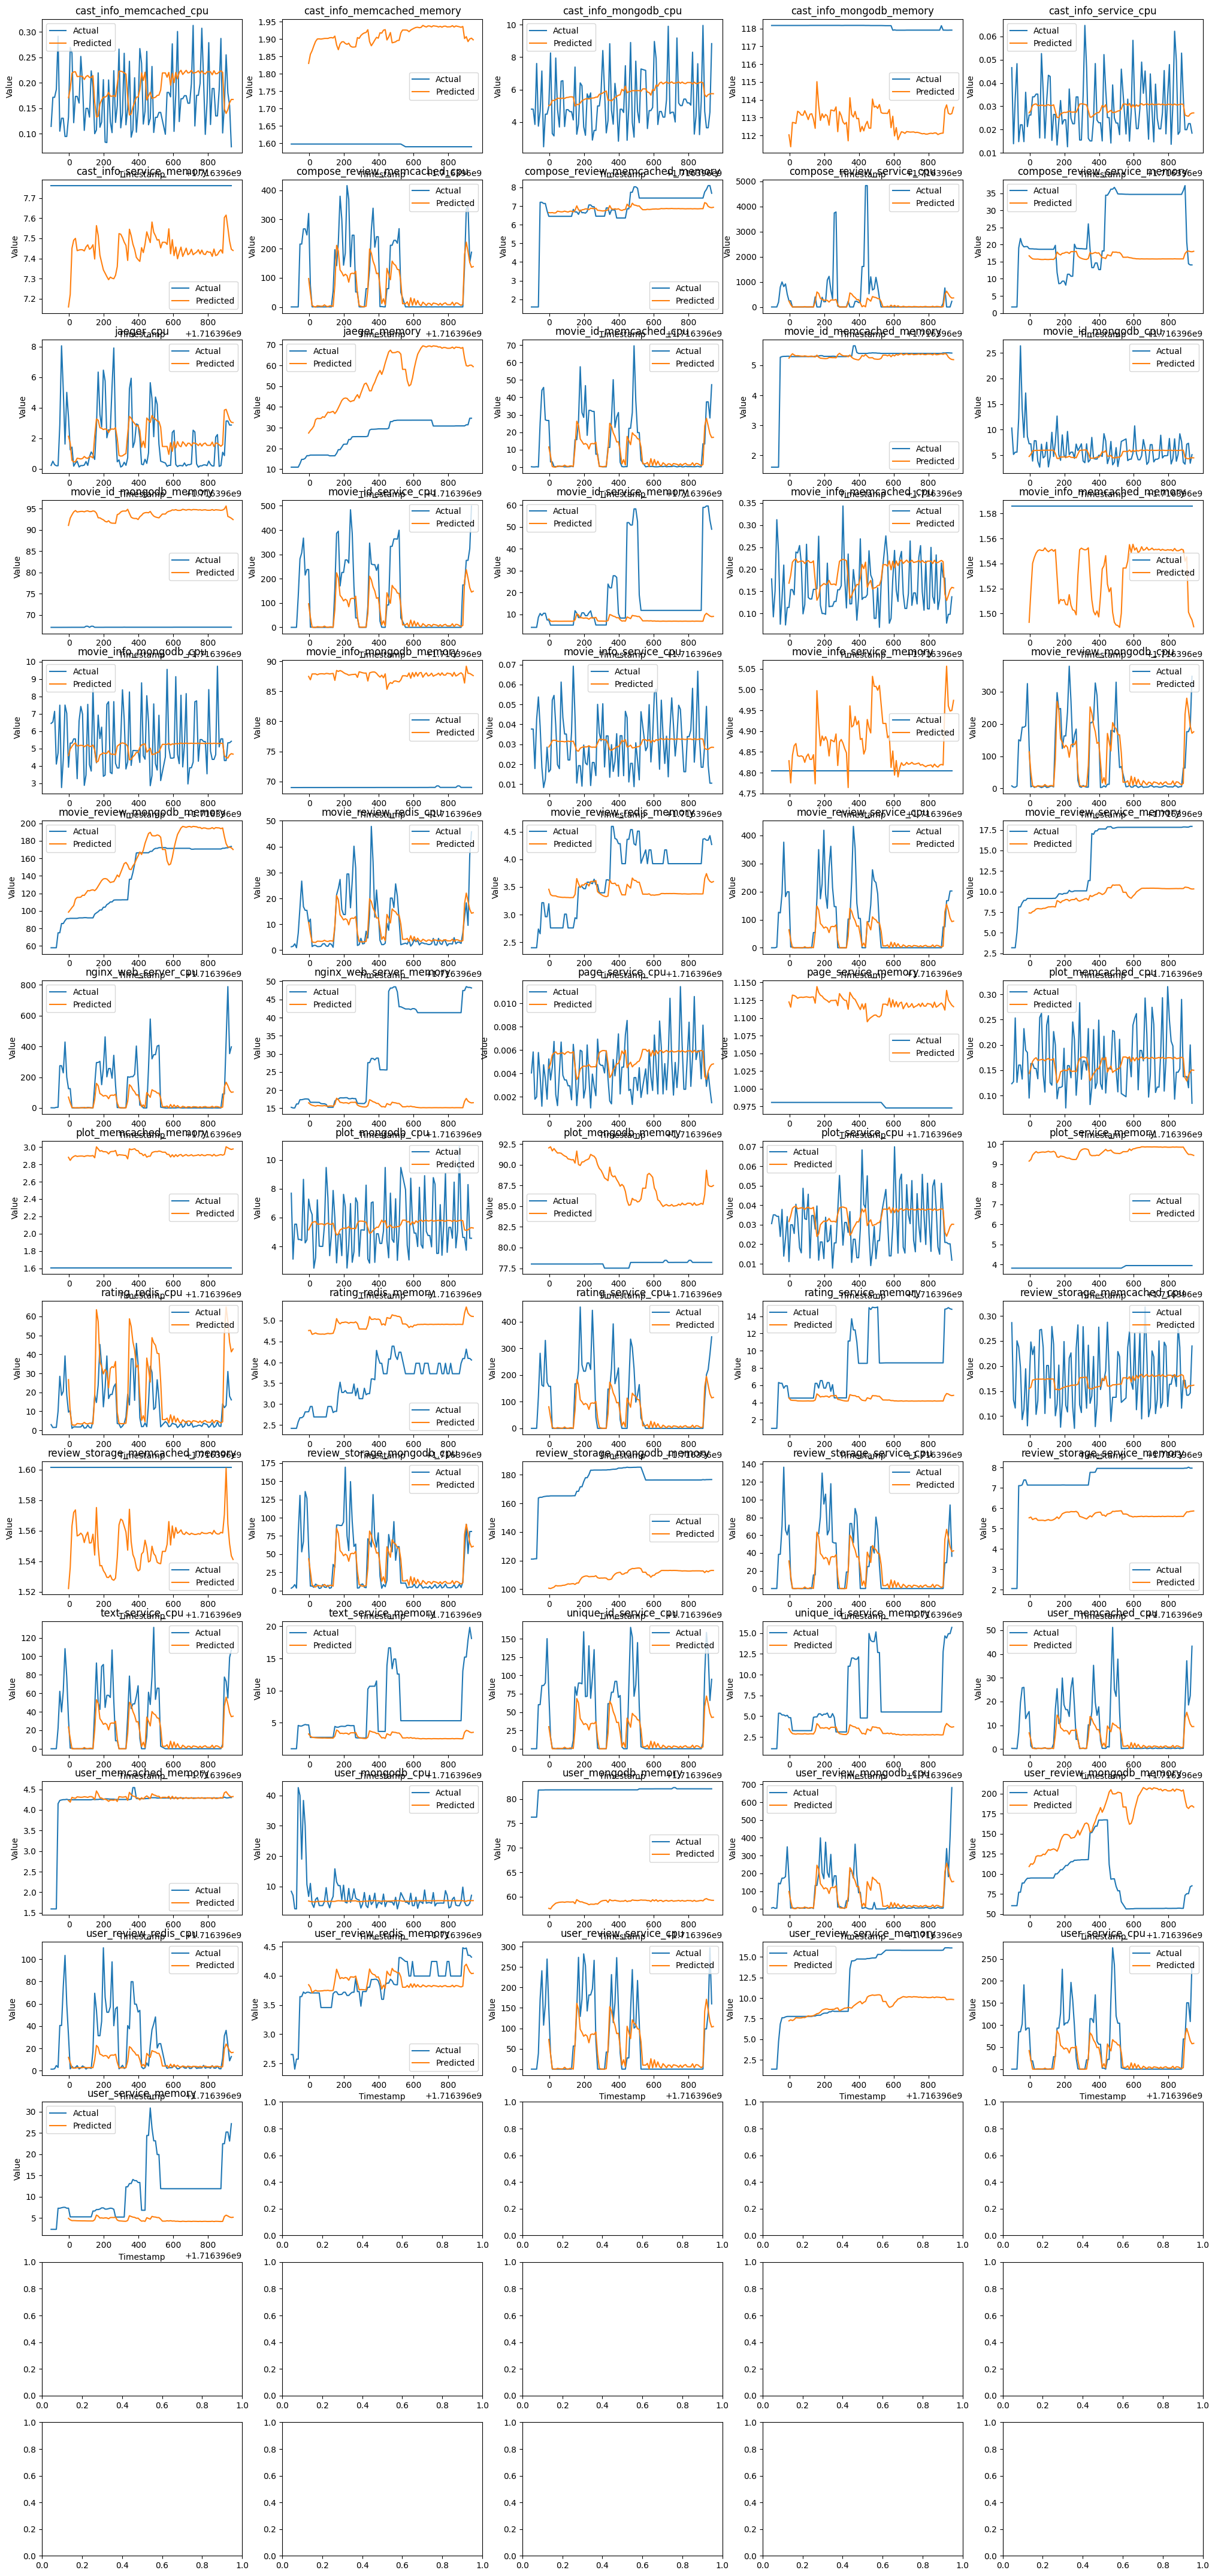

In [91]:
# Plot the data using line plot
import matplotlib.pyplot as plt
# Create 5x5 grid of subplots
fig, axes = plt.subplots(16, 5, figsize=(25, 55))
# Flatten the axes array
axes = axes.flatten()
# Plot each metric
for i, metric in enumerate(df.columns[1:][:-1]):
    axes[i].plot(df['timestamp'], df[metric], label='Actual')
    axes[i].plot(df_predicted['timestamp'], df_predicted[metric], label='Predicted')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Value')
    axes[i].legend()

In [92]:
table = "social_network_replicas"
cur = conn.cursor()
cur.execute(f"SELECT * FROM {table}")
replicas = cur.fetchall()
replicas_column_names = [desc[0] for desc in cur.description]
cur.close()

In [93]:
# Create a dataframe
replica_df = pd.DataFrame(replicas, columns=replicas_column_names)
replica_df

,id,compose_post_service,home_timeline_redis,home_timeline_service,jaeger,media_frontend,media_memcached,media_mongodb,media_service,nginx_thrift,...,url_shorten_mongodb,url_shorten_service,user_memcached,user_mention_service,user_mongodb,user_service,user_timeline_mongodb,user_timeline_redis,user_timeline_service,timestamp
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1715788153
1,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1715788163
2,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1715788173
3,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1715788183
4,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1715788193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,1,5,1,1,1,1,1,1,1,...,5,1,1,1,1,1,5,1,1,1715789002
84,85,1,5,1,1,1,1,1,1,1,...,5,1,1,1,1,1,5,1,1,1715789012
85,86,1,5,1,1,1,1,1,1,1,...,5,1,1,1,1,1,5,1,1,1715789022
86,87,1,5,1,1,1,1,1,1,1,...,5,1,1,1,1,1,5,1,1,1715789032


In [94]:
i = 2
replica_df[replicas_column_names[i]]

0     1
1     1
2     1
3     1
4     1
     ..
83    5
84    5
85    5
86    5
87    5
Name: home_timeline_redis, Length: 88, dtype: int64

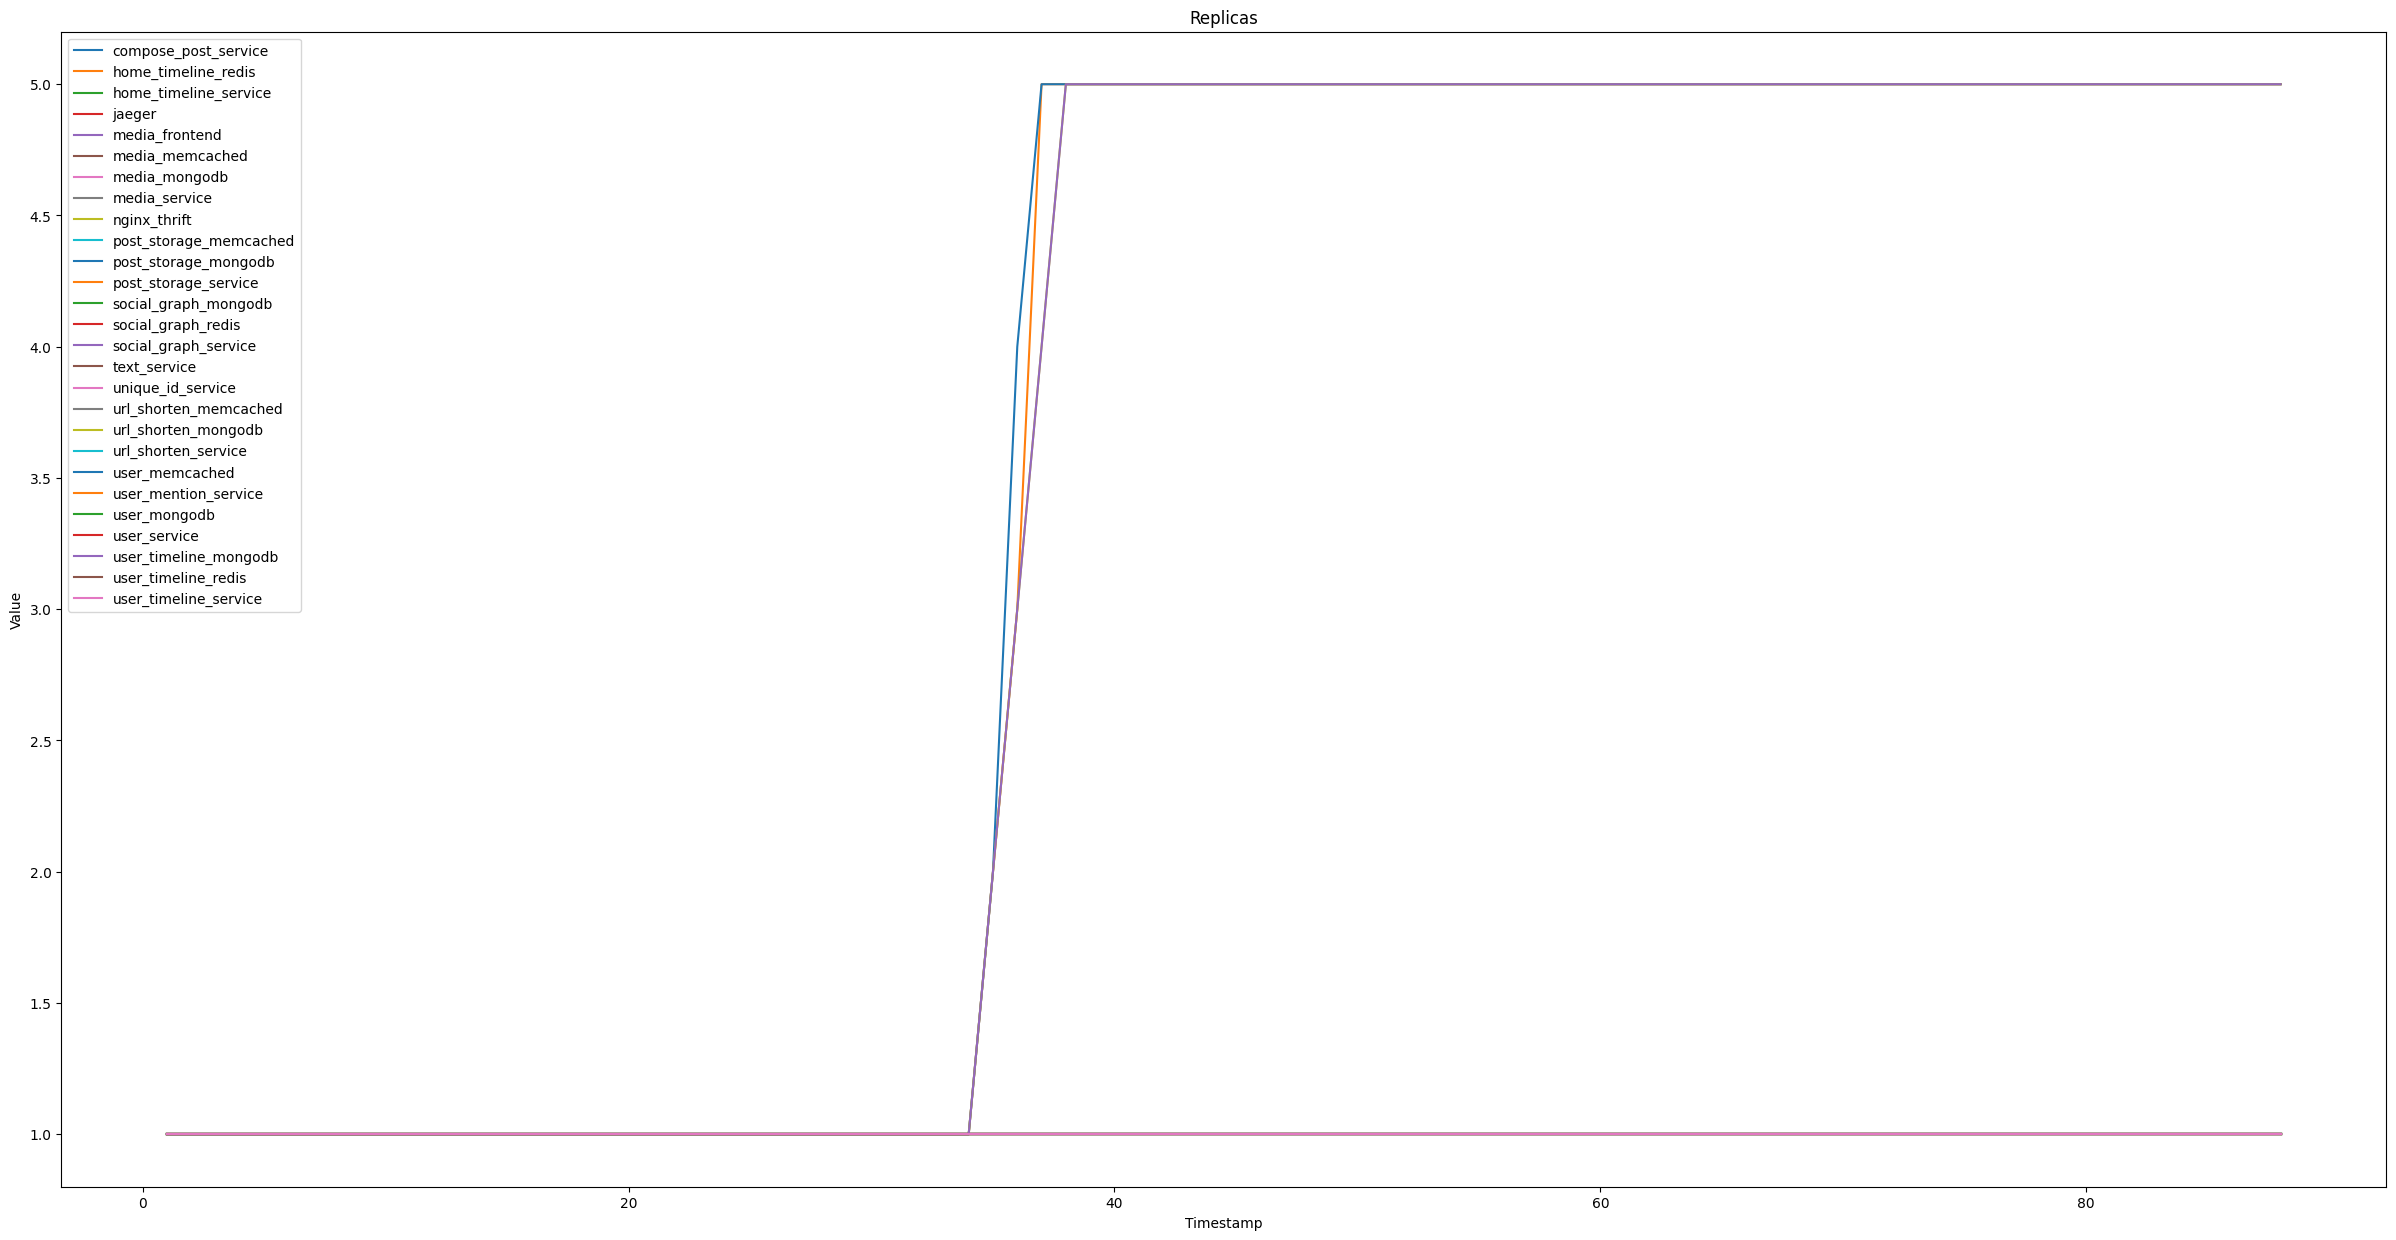

In [95]:
# Plot the data using line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15))
for replicas_column_name in replicas_column_names[1:]:
    if replicas_column_name == "timestamp":
        continue
    plt.plot(replica_df["id"], replica_df[replicas_column_name], label=replicas_column_name)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Replicas')
plt.legend()
plt.show()
